In [ ]:
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

import TensorFlow
import Python

let subprocess = Python.import("subprocess")
let plt = Python.import("matplotlib.pyplot")
let np = Python.import("numpy")

let IMAGENETTE_URL = "https://s3.amazonaws.com/fast-ai-imageclas/imagenette.tgz"
let IMAGENETTE_160_URL = "https://s3.amazonaws.com/fast-ai-imageclas/imagenette-160.tgz"
let IMAGENETTE_320_URL = "https://s3.amazonaws.com/fast-ai-imageclas/imagenette-320.tgz"
let IMAGENETTE_FILE = "imagenette.tgz"

In [ ]:
// First let us download the dataset. 
func downloadImagenetteData(_ url: String, _ filename: String) -> String {
    let urllib = Python.import("urllib.request")
    let downloadResult = urllib.urlretrieve(url, filename)
    print("\(downloadResult[0])")
    return String(downloadResult[0])!
}

//downloadImagenetteData(IMAGENETTE_160_URL, IMAGENETTE_FILE)
subprocess.run(["wget", IMAGENETTE_160_URL])
subprocess.run(["tar", "-xzvf", "imagenette-160.tgz"])
subprocess.run(["ls"])

--2019-04-09 01:15:11--  https://s3.amazonaws.com/fast-ai-imageclas/imagenette-160.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.237.245
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.237.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98752094 (94M) [application/x-tar]
Saving to: ‘imagenette-160.tgz.2’

imagenette-160.tgz. 100%[===================>]  94.18M  10.7MB/s    in 8.5s    

2019-04-09 01:15:20 (11.1 MB/s) - ‘imagenette-160.tgz.2’ saved [98752094/98752094]

imagenette-160/
imagenette-160/val/
imagenette-160/val/n03028079/
imagenette-160/val/n03028079/ILSVRC2012_val_00034021.JPEG
imagenette-160/val/n03028079/ILSVRC2012_val_00026451.JPEG
imagenette-160/val/n03028079/ILSVRC2012_val_00006268.JPEG
imagenette-160/val/n03028079/ILSVRC2012_val_00004912.JPEG
imagenette-160/val/n03028079/ILSVRC2012_val_00009705.JPEG
imagenette-160/val/n03028079/ILSVRC2012_val_00017783.JPEG
imagenette-160/val/n03028079/ILSVRC2012_val_00033509.JPEG
ima

imagenette-160/train/n03028079/n03028079_4813.JPEG
imagenette-160/train/n03028079/n03028079_37037.JPEG
imagenette-160/train/n03028079/n03028079_98786.JPEG
imagenette-160/train/n03028079/n03028079_32118.JPEG
imagenette-160/train/n03028079/n03028079_9560.JPEG
imagenette-160/train/n03028079/n03028079_76427.JPEG
imagenette-160/train/n03028079/n03028079_4015.JPEG
imagenette-160/train/n03028079/n03028079_29714.JPEG
imagenette-160/train/n03028079/n03028079_2363.JPEG
imagenette-160/train/n03028079/n03028079_26371.JPEG
imagenette-160/train/n03028079/n03028079_31112.JPEG
imagenette-160/train/n03028079/n03028079_6373.JPEG
imagenette-160/train/n03028079/n03028079_15507.JPEG
imagenette-160/train/n03028079/n03028079_40565.JPEG
imagenette-160/train/n03028079/n03028079_24072.JPEG
imagenette-160/train/n03028079/n03028079_9580.JPEG
imagenette-160/train/n03028079/n03028079_10407.JPEG
imagenette-160/train/n03028079/n03028079_6720.JPEG
imagenette-160/train/n03028079/n03028079_7017.JPEG
imagenette-160/train

imagenette-160/train/n03417042/n03417042_7653.JPEG
imagenette-160/train/n03417042/n03417042_27602.JPEG
imagenette-160/train/n03417042/n03417042_27383.JPEG
imagenette-160/train/n03417042/n03417042_21788.JPEG
imagenette-160/train/n03417042/n03417042_27320.JPEG
imagenette-160/train/n03417042/n03417042_6420.JPEG
imagenette-160/train/n03417042/n03417042_2103.JPEG
imagenette-160/train/n03417042/n03417042_6517.JPEG
imagenette-160/train/n03417042/n03417042_12145.JPEG
imagenette-160/train/n03417042/n03417042_8919.JPEG
imagenette-160/train/n03417042/n03417042_6809.JPEG
imagenette-160/train/n03417042/n03417042_28700.JPEG
imagenette-160/train/n03417042/n03417042_12304.JPEG
imagenette-160/train/n03417042/n03417042_1029.JPEG
imagenette-160/train/n03417042/n03417042_6278.JPEG
imagenette-160/train/n03417042/n03417042_4879.JPEG
imagenette-160/train/n03417042/n03417042_16403.JPEG
imagenette-160/train/n03417042/n03417042_9969.JPEG
imagenette-160/train/n03417042/n03417042_7365.JPEG
imagenette-160/train/n0

imagenette-160/train/n03000684/n03000684_21415.JPEG
imagenette-160/train/n03000684/n03000684_4865.JPEG
imagenette-160/train/n03000684/n03000684_17587.JPEG
imagenette-160/train/n03000684/n03000684_14234.JPEG
imagenette-160/train/n03000684/n03000684_6748.JPEG
imagenette-160/train/n03000684/n03000684_4746.JPEG
imagenette-160/train/n03000684/n03000684_7573.JPEG
imagenette-160/train/n03000684/n03000684_13510.JPEG
imagenette-160/train/n03000684/n03000684_5784.JPEG
imagenette-160/train/n03000684/n03000684_7012.JPEG
imagenette-160/train/n03000684/n03000684_31890.JPEG
imagenette-160/train/n03000684/n03000684_7822.JPEG
imagenette-160/train/n03000684/n03000684_440.JPEG
imagenette-160/train/n03000684/n03000684_6716.JPEG
imagenette-160/train/n03000684/n03000684_19792.JPEG
imagenette-160/train/n03000684/n03000684_12205.JPEG
imagenette-160/train/n03000684/n03000684_17254.JPEG
imagenette-160/train/n03000684/n03000684_22628.JPEG
imagenette-160/train/n03000684/n03000684_18153.JPEG
imagenette-160/train/n

imagenette-160/train/n02979186/n02979186_8785.JPEG
imagenette-160/train/n02979186/n02979186_5612.JPEG
imagenette-160/train/n02979186/n02979186_15226.JPEG
imagenette-160/train/n02979186/n02979186_5079.JPEG
imagenette-160/train/n02979186/n02979186_3010.JPEG
imagenette-160/train/n02979186/n02979186_18328.JPEG
imagenette-160/train/n02979186/n02979186_1196.JPEG
imagenette-160/train/n02979186/n02979186_3967.JPEG
imagenette-160/train/n02979186/n02979186_14964.JPEG
imagenette-160/train/n02979186/n02979186_14498.JPEG
imagenette-160/train/n02979186/n02979186_26897.JPEG
imagenette-160/train/n02979186/n02979186_20108.JPEG
imagenette-160/train/n02979186/n02979186_7103.JPEG
imagenette-160/train/n02979186/n02979186_4284.JPEG
imagenette-160/train/n02979186/n02979186_16284.JPEG
imagenette-160/train/n02979186/n02979186_15694.JPEG
imagenette-160/train/n02979186/n02979186_16667.JPEG
imagenette-160/train/n02979186/n02979186_4780.JPEG
imagenette-160/train/n02979186/n02979186_5346.JPEG
imagenette-160/train/n

imagenette-160/train/n03425413/n03425413_2717.JPEG
imagenette-160/train/n03425413/n03425413_8248.JPEG
imagenette-160/train/n03425413/n03425413_19228.JPEG
imagenette-160/train/n03425413/n03425413_7826.JPEG
imagenette-160/train/n03425413/n03425413_2840.JPEG
imagenette-160/train/n03425413/n03425413_16659.JPEG
imagenette-160/train/n03425413/n03425413_1834.JPEG
imagenette-160/train/n03425413/n03425413_9940.JPEG
imagenette-160/train/n03425413/n03425413_12743.JPEG
imagenette-160/train/n03425413/n03425413_20121.JPEG
imagenette-160/train/n03425413/n03425413_718.JPEG
imagenette-160/train/n03425413/n03425413_16202.JPEG
imagenette-160/train/n03425413/n03425413_20823.JPEG
imagenette-160/train/n03425413/n03425413_11029.JPEG
imagenette-160/train/n03425413/n03425413_19251.JPEG
imagenette-160/train/n03425413/n03425413_17858.JPEG
imagenette-160/train/n03425413/n03425413_24552.JPEG
imagenette-160/train/n03425413/n03425413_14645.JPEG
imagenette-160/train/n03425413/n03425413_16458.JPEG
imagenette-160/train

imagenette-160/train/n03394916/n03394916_54366.JPEG
imagenette-160/train/n03394916/n03394916_54247.JPEG
imagenette-160/train/n03394916/n03394916_53581.JPEG
imagenette-160/train/n03394916/n03394916_31003.JPEG
imagenette-160/train/n03394916/n03394916_7999.JPEG
imagenette-160/train/n03394916/n03394916_18315.JPEG
imagenette-160/train/n03394916/n03394916_57922.JPEG
imagenette-160/train/n03394916/n03394916_55028.JPEG
imagenette-160/train/n03394916/n03394916_58467.JPEG
imagenette-160/train/n03394916/n03394916_12949.JPEG
imagenette-160/train/n03394916/n03394916_30451.JPEG
imagenette-160/train/n03394916/n03394916_27139.JPEG
imagenette-160/train/n03394916/n03394916_32486.JPEG
imagenette-160/train/n03394916/n03394916_35315.JPEG
imagenette-160/train/n03394916/n03394916_53962.JPEG
imagenette-160/train/n03394916/n03394916_2708.JPEG
imagenette-160/train/n03394916/n03394916_30117.JPEG
imagenette-160/train/n03394916/n03394916_29983.JPEG
imagenette-160/train/n03394916/n03394916_51373.JPEG
imagenette-160

imagenette-160/train/n03888257/n03888257_32703.JPEG
imagenette-160/train/n03888257/n03888257_2953.JPEG
imagenette-160/train/n03888257/n03888257_41391.JPEG
imagenette-160/train/n03888257/n03888257_9640.JPEG
imagenette-160/train/n03888257/n03888257_34169.JPEG
imagenette-160/train/n03888257/n03888257_12094.JPEG
imagenette-160/train/n03888257/n03888257_18441.JPEG
imagenette-160/train/n03888257/n03888257_18956.JPEG
imagenette-160/train/n03888257/n03888257_5404.JPEG
imagenette-160/train/n03888257/n03888257_10653.JPEG
imagenette-160/train/n03888257/n03888257_9650.JPEG
imagenette-160/train/n03888257/n03888257_128.JPEG
imagenette-160/train/n03888257/n03888257_12413.JPEG
imagenette-160/train/n03888257/n03888257_22473.JPEG
imagenette-160/train/n03888257/n03888257_12049.JPEG
imagenette-160/train/n03888257/n03888257_8502.JPEG
imagenette-160/train/n03888257/n03888257_31301.JPEG
imagenette-160/train/n03888257/n03888257_22147.JPEG
imagenette-160/train/n03888257/n03888257_23204.JPEG
imagenette-160/trai

imagenette-160/train/n01440764/n01440764_4003.JPEG
imagenette-160/train/n01440764/n01440764_11673.JPEG
imagenette-160/train/n01440764/n01440764_28418.JPEG
imagenette-160/train/n01440764/n01440764_600.JPEG
imagenette-160/train/n01440764/n01440764_12276.JPEG
imagenette-160/train/n01440764/n01440764_7746.JPEG
imagenette-160/train/n01440764/n01440764_7585.JPEG
imagenette-160/train/n01440764/n01440764_12111.JPEG
imagenette-160/train/n01440764/n01440764_2015.JPEG
imagenette-160/train/n01440764/n01440764_8908.JPEG
imagenette-160/train/n01440764/n01440764_19005.JPEG
imagenette-160/train/n01440764/n01440764_9642.JPEG
imagenette-160/train/n01440764/n01440764_12204.JPEG
imagenette-160/train/n01440764/n01440764_9861.JPEG
imagenette-160/train/n01440764/n01440764_8421.JPEG
imagenette-160/train/n01440764/n01440764_8142.JPEG
imagenette-160/train/n01440764/n01440764_6169.JPEG
imagenette-160/train/n01440764/n01440764_9609.JPEG
imagenette-160/train/n01440764/n01440764_4744.JPEG
imagenette-160/train/n0144

CompletedProcess(args=['ls'], returncode=0)


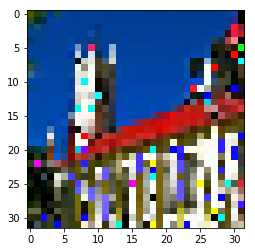

None


In [ ]:
func resizeImage(filename: StringTensor) -> Tensor<UInt8> {
    let imageBytes: StringTensor = Raw.readFile(filename: filename)
    let decodedImage = Raw.decodeJpeg(contents: imageBytes, channels: 3, dctMethod: "") 
    let resizedImages = Raw.resizeBicubic(
        images: Tensor<UInt8>([decodedImage]), 
        size: Tensor<Int32>([32, 32]))
    let resizedImage = resizedImages.reshaped(to: TensorShape(32, 32, 3))
    return Raw.cast(resizedImage)
}

let resizedImage = resizeImage(filename: StringTensor("imagenette-160/val/n03028079/ILSVRC2012_val_00003682.JPEG"))
let npa = resizedImage.makeNumpyArray()
plt.imshow(npa) //npa.shape
plt.show()


In [ ]:
let filenames = StringTensor([
    "imagenette-160/val/n03028079/ILSVRC2012_val_00034021.JPEG",
    "imagenette-160/val/n03028079/ILSVRC2012_val_00026451.JPEG",
    "imagenette-160/val/n03028079/ILSVRC2012_val_00006268.JPEG",
    "imagenette-160/val/n03028079/ILSVRC2012_val_00004912.JPEG",
    "imagenette-160/val/n03028079/ILSVRC2012_val_00009705.JPEG",
    "imagenette-160/val/n03028079/ILSVRC2012_val_00017783.JPEG",
    "imagenette-160/val/n03028079/ILSVRC2012_val_00033509.JPEG",
    "imagenette-160/val/n03028079/ILSVRC2012_val_00046232.JPEG",
    "imagenette-160/val/n03028079/ILSVRC2012_val_00019331.JPEG",
    "imagenette-160/val/n03028079/ILSVRC2012_val_00005295.JPEG",
    "imagenette-160/val/n03028079/ILSVRC2012_val_00048853.JPEG",
    "imagenette-160/val/n03028079/ILSVRC2012_val_00035753.JPEG",
    "imagenette-160/val/n03028079/ILSVRC2012_val_00004939.JPEG",
    "imagenette-160/val/n03028079/ILSVRC2012_val_00008116.JPEG",
    "imagenette-160/val/n03028079/ILSVRC2012_val_00034220.JPEG"])


Processing image 0
Processing image 1
Processing image 2
Processing image 3


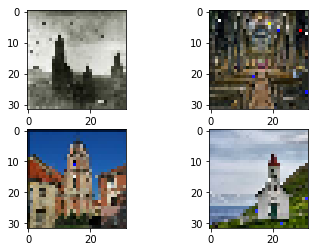

None


In [ ]:
let ds:Dataset<Tensor<UInt8>> = Dataset<StringTensor>(elements: filenames).map(resizeImage)
//.batched(5) // For batching

let rows = 2 
let cols = 2 
//plt.figure(figsize: [rows * 3, cols * 3])

for (i, d) in ds.enumerated() {
    print("Processing image \(i)")
    let img = plt.subplot(rows, cols, i + 1)
    img.imshow(d.makeNumpyArray())
    if (i + 1) >= (rows * cols) { break }
}
plt.show()
